In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22325


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22320,2021-04-30,47,沖縄県,59,12463,2,136
22321,2021-05-01,47,沖縄県,105,12568,1,137
22322,2021-05-02,47,沖縄県,57,12625,0,137
22323,2021-05-03,47,沖縄県,57,12682,0,137
22324,2021-05-04,47,沖縄県,33,12715,0,137


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数_1日ごとの発表数
42,静岡県,10450,6607,122
43,香川県,17575,1345,23
44,高知県,18525,1090,20
45,鳥取県,14725,377,2
46,鹿児島県,21850,2311,28


## 人口データを付与

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)
pop.head()

,都道府県名,人口
0,北海道,5267762
1,青森県,1275783
2,岩手県,1235517
3,宮城県,2292385
4,秋田県,985416


In [5]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数_1日ごとの発表数,人口
0,三重県,11400,3930,87,1813859
1,京都府,12350,13070,188,2545899
2,佐賀県,19475,1702,14,823810
3,兵庫県,13300,33260,708,5549568
4,北海道,475,25023,876,5267762


## 人口当たりの感染者数

In [6]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数_1日ごとの発表数,人口,１万人当たりの感染者数
4,北海道,475,25023,876,5267762,47.502146
41,青森県,950,1640,23,1275783,12.854851
19,岩手県,1425,1002,32,1235517,8.109965
11,宮城県,1900,8167,69,2292385,35.626651
36,秋田県,2375,517,9,985416,5.246515
15,山形県,2850,1550,34,1082296,14.321406
35,福島県,3325,3556,125,1881981,18.894984
38,茨城県,3800,8348,135,2921436,28.574988
27,栃木県,4275,5440,71,1965516,27.677210
37,群馬県,4750,6298,104,1969439,31.978650


## 感染者数

### 平均値、中央値

In [7]:
print(all_jp["各地の感染者数合計"].describe())

count        47.000000
mean      12992.276596
std       25368.829679
min         362.000000
25%        1671.000000
50%        3908.000000
75%        8257.500000
max      142322.000000
Name: 各地の感染者数合計, dtype: float64


## １万人あたりの感染者数

### 平均値、中央値

In [8]:
print(all_jp["１万人当たりの感染者数"].describe())

count     47.000000
mean      29.732306
std       22.726425
min        5.246515
25%       14.734087
50%       21.666513
75%       40.747694
max      102.871537
Name: １万人当たりの感染者数, dtype: float64


## グラフ化

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [10]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)


<IPython.core.display.Javascript object>


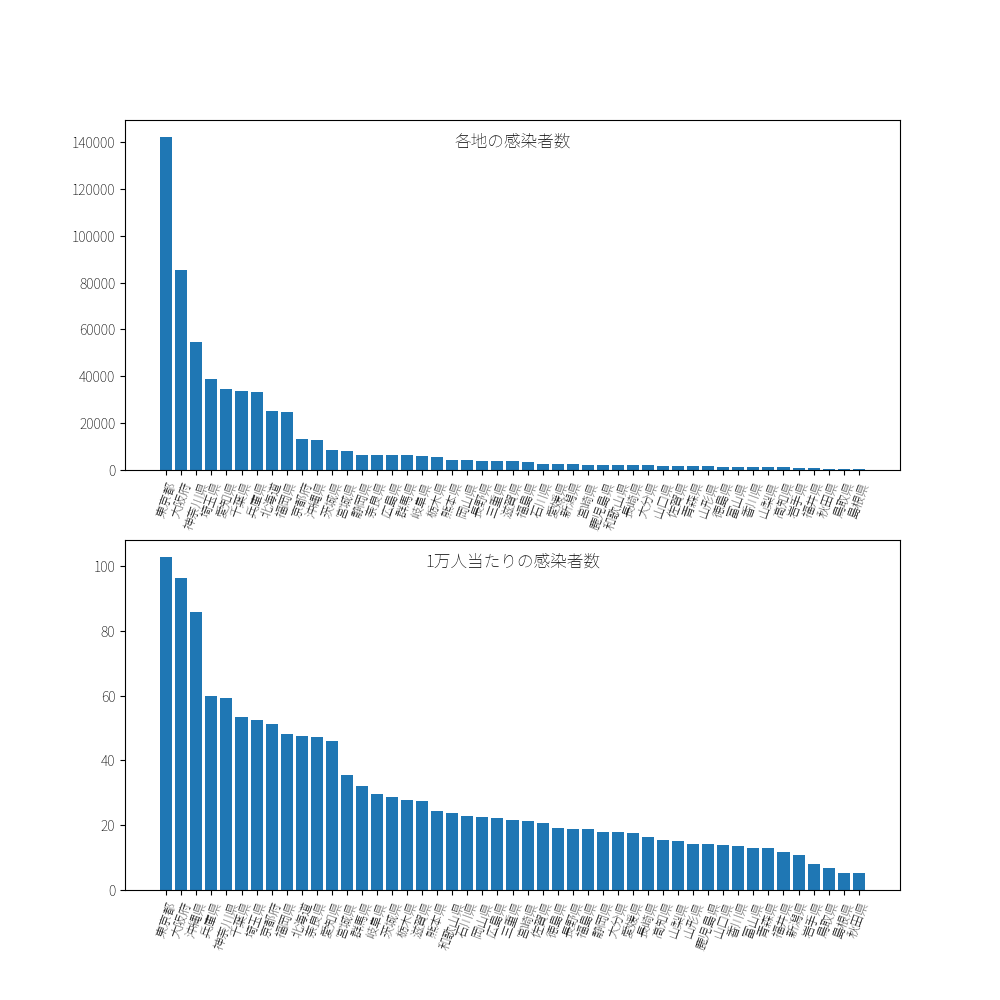

Text(0.5, 0.9, '1万人当たりの感染者数')

In [11]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


## 度数分布表

In [12]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=10)

print(hist)
print(bin_edges)

[38  2  4  1  0  1  0  0  0  1]
[   362.  14558.  28754.  42950.  57146.  71342.  85538.  99734. 113930.
 128126. 142322.]


## ヒストグラム

<IPython.core.display.Javascript object>


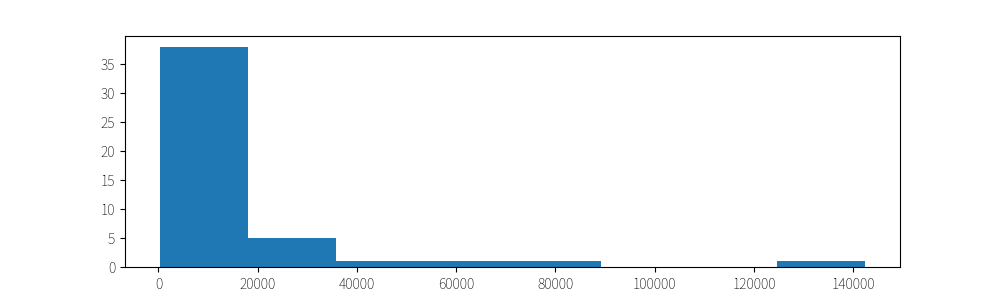

(array([38.,  5.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([   362.,  18107.,  35852.,  53597.,  71342.,  89087., 106832.,
        124577., 142322.]),
 <a list of 8 Patch objects>)

In [13]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=8)